In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Sal=pd.read_csv('Salaries.csv')

In [4]:
Sal.head(2)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


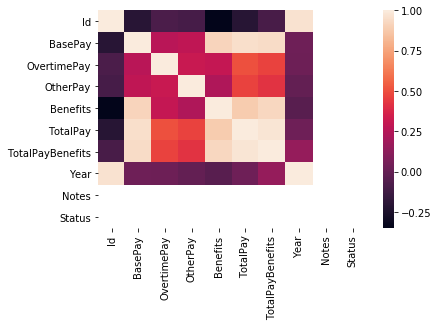

In [5]:
sns.heatmap(Sal.corr())

In [6]:
data=Sal.iloc[:,2:11]

In [7]:
x=data.drop(columns=['JobTitle','TotalPay'])

In [8]:
x=x.fillna(0)

In [9]:
x.head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits,Year,Notes
0,167411.18,0.00,400184.25,0.0,567595.43,2011,0.0
1,155966.02,245131.88,137811.38,0.0,538909.28,2011,0.0
2,212739.13,106088.18,16452.60,0.0,335279.91,2011,0.0
3,77916.00,56120.71,198306.90,0.0,332343.61,2011,0.0
4,134401.60,9737.00,182234.59,0.0,326373.19,2011,0.0


In [10]:
y=data['TotalPay']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.20)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 1.38643722e+00  1.38643722e+00  1.38643722e+00  3.86437217e-01
 -3.86437217e-01 -4.27683513e-13  0.00000000e+00]


In [17]:
print('Coefficients: \n', lm.intercept_)

Coefficients: 
 8.585629984736443e-10


In [18]:
predict_y=lm.predict(x_test)

In [19]:
predict_y

array([153806.56,  20389.19,   4701.01, ..., 130038.04,  23221.05,
        71474.99])

Text(0,0.5,'Predicted Y')

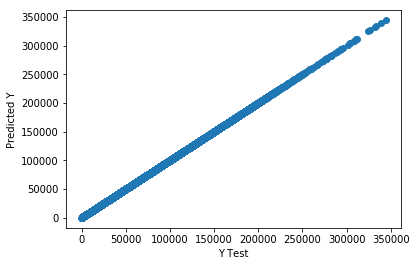

In [20]:
plt.scatter(y_test,predict_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [23]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predict_y))
print('MSE:', metrics.mean_squared_error(y_test, predict_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predict_y)))


MAE: 4.104157141632904e-11
MSE: 5.0090224597648726e-21
RMSE: 7.077444778848418e-11


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


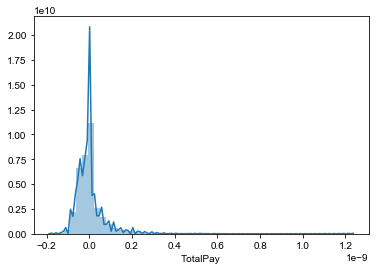

In [22]:
sns.distplot((y_test-predict_y),bins=50);
sns.set_style('whitegrid')